In [9]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
local_dir = 'C:\\Users\\wc11\\OneDrive\\Documents\\Graduate Research\\Brainstem\\Force_analysis\\'

# Initialize the data frame
grp_dir = 'Feedback_output\\'
feed_bool = True
subj_id = 'BS001_WD'
scan_rep = 'T1'

print('Reading in file...', end = ' ')
file = local_dir + grp_dir + subj_id + '_' + scan_rep + '_analyzed.txt'
data = pd.read_csv(file, sep='\t')
data_out_feed = pd.DataFrame(columns = data.columns)
data_out_nofeed = pd.DataFrame(columns = data.columns)
print('Done')

Reading in file... Done


In [3]:
grp_dir = 'Feedback_output\\'
feed_bool = True

for filename in os.listdir(local_dir + grp_dir):
    split_i = filename.split("_")
    subj_id = split_i[0] + "_" + split_i[1]
    scan_rep = split_i[2]
    
    # Read in file
    file = local_dir + grp_dir + subj_id + '_' + scan_rep + '_analyzed.txt'
    data = pd.read_csv(file, sep='\t')
    
    # Calculate mean of all columns
    scan_info = pd.Series([subj_id, scan_rep, feed_bool], index=['Subj_ID', 'Scan_rep', 'Feedback'])
    subj_mean = data.mean(0)
    subj_mean = subj_mean.append(scan_info)
    subj_mean.name = subj_id + '_' + scan_rep
    data_out_feed = data_out_feed.append(subj_mean)

In [4]:
grp_dir = 'NoFeedback_output\\'
feed_bool = False

for filename in os.listdir(local_dir + grp_dir):
    split_i = filename.split("_")
    subj_id = split_i[0] + "_" + split_i[1]
    scan_rep = split_i[2]
    
    # Read in file
    file = local_dir + grp_dir + subj_id + '_' + scan_rep + '_analyzed.txt'
    data = pd.read_csv(file, sep='\t')
    
    # Calculate mean of all columns
    scan_info = pd.Series([subj_id, scan_rep, feed_bool], index=['Subj_ID', 'Scan_rep', 'Feedback'])
    subj_mean = data.mean(0)
    subj_mean = subj_mean.append(scan_info)
    subj_mean.name = subj_id + '_' + scan_rep
    data_out_nofeed = data_out_nofeed.append(subj_mean)

In [5]:
data_out_feed.mean(0)

Block #                       2.498233
Pulse #                       5.488600
duration                      2.032889
force all (N)                 6.769076
SD all (N)                    4.818397
Force middle (N)             10.435732
SD middle (N)                 0.453610
force all (%)                 9.413250
SD all (%)                    6.696025
Force middle (%)             14.510054
SD middle (%)                 0.632517
RoC increase                 57.675566
RoC decrease               -117.976523
RMSE (middle)                 0.762422
PeakForce (N)                11.559036
TargetForce(N)               10.777925
CE (N)                       -0.342193
PeakForce (%)                16.076096
TargetForce(%)               15.000000
CE (%)                       96.733693
sample entropy half           0.343711
approximate entropy half      0.328288
Feedback                      1.000000
dtype: float64

In [6]:
data_out_feed.std(0)

Block #                      0.010240
Pulse #                      0.049792
duration                     0.099325
force all (N)                1.142443
SD all (N)                   0.813589
Force middle (N)             1.705412
SD middle (N)                0.150217
force all (%)                0.491177
SD all (%)                   0.273263
Force middle (%)             0.414976
SD middle (%)                0.170847
RoC increase                21.345240
RoC decrease                28.390467
RMSE (middle)                0.345741
PeakForce (N)                1.908505
TargetForce(N)               1.681858
CE (N)                       0.297947
PeakForce (%)                0.637838
TargetForce(%)               0.000000
CE (%)                       2.766509
sample entropy half          0.043011
approximate entropy half     0.032346
Feedback                     0.000000
dtype: float64

In [7]:
data_out_nofeed.mean(0)

Block #                       2.488513
Pulse #                       5.455389
duration                      1.947974
force all (N)                 6.847665
SD all (N)                    4.860955
Force middle (N)             10.456820
SD middle (N)                 0.847153
force all (%)                 9.549075
SD all (%)                    6.771188
Force middle (%)             14.579384
SD middle (%)                 1.191860
RoC increase                 61.473031
RoC decrease               -113.419659
RMSE (middle)                 3.920179
PeakForce (N)                12.376103
TargetForce(N)               10.761750
CE (N)                       -0.304930
PeakForce (%)                17.313405
TargetForce(%)               15.000000
CE (%)                       97.195894
sample entropy half           0.276942
approximate entropy half      0.277939
Feedback                      0.000000
dtype: float64

In [10]:
data_out_nofeed.std(0)

Block #                      0.032415
Pulse #                      0.106495
duration                     0.126723
force all (N)                2.367750
SD all (N)                   1.700253
Force middle (N)             3.596165
SD middle (N)                0.440207
force all (%)                3.110626
SD all (%)                   2.182203
Force middle (%)             4.665006
SD middle (%)                0.609305
RoC increase                30.471747
RoC decrease                44.304813
RMSE (middle)                1.524933
PeakForce (N)                4.048714
TargetForce(N)               1.684165
CE (N)                       3.301040
PeakForce (%)                5.419971
TargetForce(%)               0.000000
CE (%)                      31.100041
sample entropy half          0.057200
approximate entropy half     0.048776
Feedback                     0.000000
dtype: float64

Text(0,0.5,'Root mean squared error [N]')

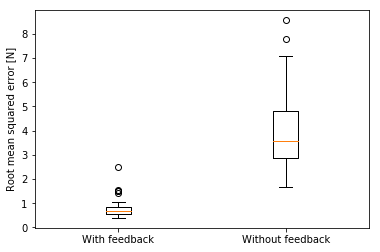

In [29]:
plt.boxplot([data_out_feed['RMSE (middle)'], data_out_nofeed['RMSE (middle)']], labels = ['With feedback', 'Without feedback'])
plt.ylabel('Root mean squared error [N]')

Text(0,0.5,'Force (%)')

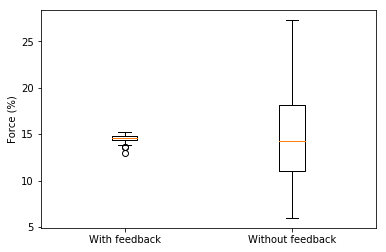

In [30]:
plt.boxplot([data_out_feed['Force middle (%)'], data_out_nofeed['Force middle (%)']], labels = ['With feedback', 'Without feedback'])
plt.ylabel('Force (%)')

In [31]:
data_out_feed.to_csv(local_dir + 'Grp_data_with_feedback.csv')
data_out_nofeed.to_csv(local_dir + 'Grp_data_with_nofeedback.csv')

import os
grp_dir = 'NoFeedback_output\\'
for filename in os.listdir(local_dir + grp_dir):
    print(filename)
    split_i = filename.split("_")
    if split_i[2] == 'Task1.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T1_analyzed.txt'
    if split_i[2] == 'Task2.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T2_analyzed.txt'
    if split_i[2] == 'Task3.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T3_analyzed.txt'
    if split_i[2] == 'T1.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T1_analyzed.txt'
    if split_i[2] == 'T2.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T2_analyzed.txt'
    if split_i[2] == 'T3.txt':
        file_out = split_i[0] + '_' + split_i[1] + '_T3_analyzed.txt'
    print(file_out)
    os.rename(local_dir + grp_dir + filename, local_dir + grp_dir + file_out)
